# 量子ビット、量子ゲート、量子回路

<Admonition type="note">
  沼田 祈史(19 Apr 2024)
    
  Translated by Kifumi Numata

  和訳版の講義スライドPDFは[こちら](https://github.com/quantum-tokyo/introduction/blob/main/src/courses/utility-scale-quantum-computing/2_utility_lecture_gate_circuit_measurement_ja.pdf)です。
  
  *この実験を実行するための QPU 時間は 約5秒です。*
</Admonition>



## 1.紹介

ビット、ゲート、および回路は、量子コンピューティングの基本的な構成要素です。量子ビットと量子ゲートを用いた回路モデルによる量子計算を学び、重ね合わせ、測定、エンタングルメントの復習も行います。

このレッスンでは、次のことを学びます。

* 単一量子ビットゲート
* ブロッホ球
* 重ね合わせ
* 測定
* 2量子ビットゲートとエンタングルメント状態

この講義の最後には、ユーティリティスケールの量子コンピューティングに不可欠な回路の深さについて学びます。



## 2. Computation as a diagram

量子ビットを使用する場合もビットを使用する場合も、入力を必要な出力に変換するためにそれらを操作する必要があります。少数のビット用の非常に単純なプログラムでは、このプロセスを **回路図** と呼ばれる図で表すと便利です。    
左下の図が古典回路の例、右下の図が量子回路の例です。
どちらの場合も、左側に入力があり、出力が右側で、その間に演算が記号によって表されます。演算に用いられる記号は、主に歴史的な背景から「ゲート」と呼ばれます。

!["classical logic and quantum circuit"](https://quantum.cloud.ibm.com/assets-docs-learning/_next/image?url=%2Flearning%2Fimages%2Fcourses%2Futility-scale-quantum-computing%2Fbits-gates-and-circuits%2Fclassical-vs-quantum.avif&w=3840&q=75)



## 3.  単一量子ビットゲート

### 3.1 量子状態とブロッホ球

量子ビットの状態は、$|0\rangle$と$|1\rangle$ の重ね合わせの状態で表します。任意の量子ビットは以下のように表します。

$$\psi =\alpha|0\rangle+ \beta|1\rangle$$ 

ここで $\alpha$ と $\beta$ は、 $|\alpha|^2+|\beta|^2=1$ を満たす複素数で、確率振幅と呼ばれます。

$|0\rangle$と$|1\rangle$は、
$|0\rangle = \begin{bmatrix}
1 \\
0
\end{bmatrix}$、
$|1\rangle = \begin{bmatrix}
0\\
1
\end{bmatrix}$
とかけるので、

$$|\psi\rangle = \alpha\begin{bmatrix}
1 \\
0
\end{bmatrix}+ \beta\begin{bmatrix}0\\
1
\end{bmatrix} = \begin{bmatrix}
\alpha \\
\beta
\end{bmatrix}$$

とも表すことができ、これから量子ビットの状態は、$|0\rangle$と$|1\rangle$を正規直交基底とする2次元の複素内積空間の単位ベクトルであることがわかります。その大きさは1に規格化されています。
$$\langle\psi|\psi\rangle = \begin{bmatrix}
\alpha^* & \beta^*
\end{bmatrix}
\begin{bmatrix}
\alpha \\
\beta
\end{bmatrix} = 1$$

$|\psi\rangle =\begin{bmatrix}
\alpha \\
\beta
\end{bmatrix}$ は状態ベクトルとも呼びます。

1量子ビットの状態は **ブロッホ球** を使うと理解しやすいです。このとき、$|\psi\rangle =\cos\frac{\theta}{2}|0\rangle+e^{i\varphi}\sin\frac{\theta}{2}|1\rangle= 
\left(
\begin{matrix}
\cos\frac{\theta}{2}\\
e^{i\varphi}\sin\frac{\theta}{2}
\end{matrix}
\right)
$ です。

ここで、$\theta$と$\varphi$は、次の図のブロッホ球の角度です。

![Bloch sphere](https://quantum.cloud.ibm.com/assets-docs-learning/_next/image?url=%2Flearning%2Fimages%2Fcourses%2Futility-scale-quantum-computing%2Fbits-gates-and-circuits%2Fbloch.avif&w=3840&q=75)



量子演算について、Qiskitで基本的な計算方法を学びます。     
コードセルは、セルを選択して「Shift」＋「Enter」で実行できます。まずライブラリーをインポートします。



In [1]:
# Import the qiskit library
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
from qiskit_ibm_runtime import Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram

#### 空の回路
1量子ビットの回路を作成し、描画します。


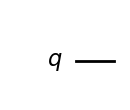

In [2]:
# Create the single-qubit quantum circuit
qc = QuantumCircuit(1)

# Draw the circuit
qc.draw("mpl")

#### Xゲート
Xゲートはブロッホ球の$x$軸周りの$\pi$回転です。
$|0\rangle$にXゲートを適用すると$|1\rangle$、$|1\rangle$にXゲートを適用すると$|0\rangle$になるので、古典のNOTゲートのような操作が実現でき、ビット反転とも呼ばれます。

$X = \begin{pmatrix}
0 & 1 \\
1 & 0 \\
\end{pmatrix}$


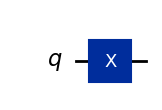

In [3]:
qc = QuantumCircuit(1)  # Prepare the single-qubit quantum circuit

# Apply a X gate to qubit 0
qc.x(0)

# Draw the circuit
qc.draw("mpl")

 IBM Quantum®では、初期状態は$|0\rangle$にセットされていますので、上記の量子回路は、行列ベクトル表示では

$X|0\rangle=  \begin{pmatrix}
0 & 1 \\\
1 & 0
\end{pmatrix} 
\begin{pmatrix}
1 \\\
0
\end{pmatrix} 
 =\begin{pmatrix}
0 \\\
1
\end{pmatrix} = |1\rangle$ 

となります。次にこの回路の出力ベクトルを状態ベクトルシミュレーターを使って実行してみます。


Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


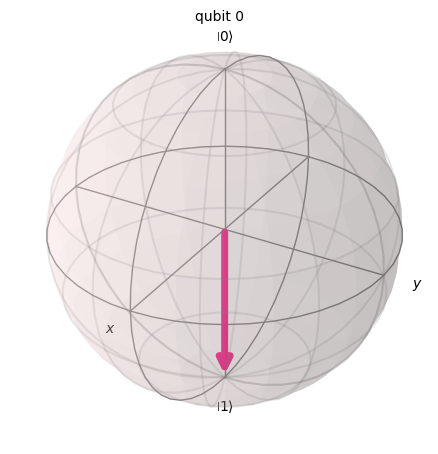

In [4]:
# See the statevector
out_vector = Statevector(qc)
print(out_vector)

# Draw a Bloch sphere
plot_bloch_multivector(out_vector)

縦ベクトルが横ベクトル表示で、複素数(虚部の添字は $j$)で表示されています。

#### Hゲート

Hadamardゲート(アダマールゲート)はブロッホ球の$x$軸と$z$軸の中間の軸周りの$\pi$回転です。
例えば$|0\rangle$にHゲートを適用すると、$\frac{|0\rangle + |1\rangle}{\sqrt{2}}$のような重ね合わせ状態を作ることができます。

$H = \frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 1 \\
1 & -1 \\
\end{pmatrix}$

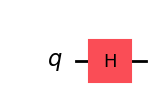

In [5]:
qc = QuantumCircuit(1)  # Create the single-qubit quantum circuit

# Apply an Hadamard gate to qubit 0
qc.h(0)

# Draw the circuit
qc.draw(output="mpl")

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


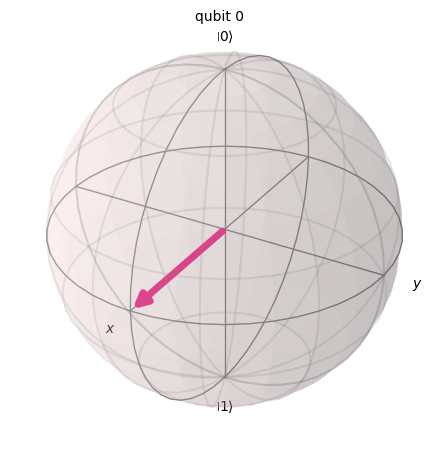

In [6]:
# See the statevector
out_vector = Statevector(qc)
print(out_vector)

# Draw a Bloch sphere
plot_bloch_multivector(out_vector)

これは、

$$
H|0\rangle= \frac{1}{\sqrt{2}} \begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}
\begin{pmatrix}
1 \\0
\end{pmatrix}
 =\frac{1}{\sqrt{2}}\begin{pmatrix}
1 \\
1
\end{pmatrix}
=\begin{pmatrix}
0.707 \\
0.707
\end{pmatrix}
=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)
$$
です。

この重ね合わせ状態は非常に一般的で重要であるため、独自の記号が付けられています。


$$
|+\rangle \equiv \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle).
$$

$H$ゲートを$|0\rangle$に実行すると、$|0\rangle$と$|1\rangle$の均等な重ね合わせ状態が作れることが分かります。




#### $|-\rangle$ 状態

$|-\rangle$状態もあります。

$$
|-\rangle \equiv \frac{|0\rangle -|1\rangle}{\sqrt{2}}.
$$

この状態を作るには、まずXゲートを適用して$|1\rangle$を作り、次にHゲートを適用します。

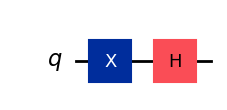

In [7]:
qc = QuantumCircuit(1)  # Create the single-qubit quantum circuit

# Apply a X gate to qubit 0
qc.x(0)

# Apply an Hadamard gate to qubit 0
qc.h(0)

# draw the circuit
qc.draw(output="mpl")

Statevector([ 0.70710678+0.j, -0.70710678+0.j],
            dims=(2,))


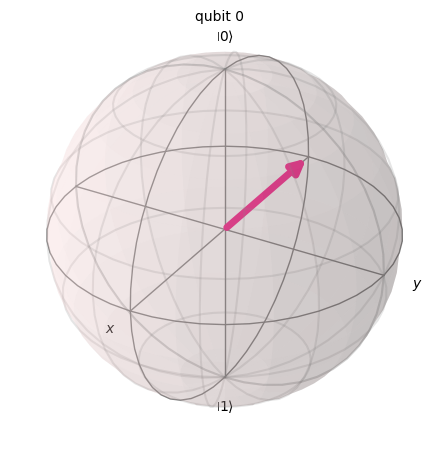

In [8]:
# See the statevector
out_vector = Statevector(qc)
print(out_vector)

# Draw a Bloch sphere
plot_bloch_multivector(out_vector)

これは以下になります。

$$
H|1\rangle= \frac{1}{\sqrt{2}} \begin{pmatrix}
1 & 1 \\\
1 & -1
\end{pmatrix}
\begin{pmatrix}
0 \\\
1
\end{pmatrix}
 =\frac{1}{\sqrt{2}}\begin{pmatrix}
1 \\\
-1
\end{pmatrix}
=\begin{pmatrix}
0.707 \\\
-0.707
\end{pmatrix}
=\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle) = |-\rangle
$$

$|1\rangle$に$H$ゲートを実行した結果、$|0\rangle$と$|1\rangle$の均等な重ね合わせ状態になりますが、$|1\rangle$の符号がマイナスになります。



### 3.2 量子状態とユニタリー行列

これまでQiskitで確認した量子状態の変化は、ユニタリー行列をかけることで表されます。
$$|\psi^{'}\rangle = U|\psi\rangle$$

ユニタリー行列とは、以下を満たす行列でした。
$$U^{\dagger}U =U U^{\dagger} = I$$

このユニタリー行列による変化が量子ビットに量子ゲートをかけることを意味します。代表的な1量子ビットゲートには以下のものがあります。　

パウリゲート

$$X = \begin{pmatrix}
0 & 1 \\
1 & 0 \\
\end{pmatrix}
= |0\rangle \langle 1|+|1\rangle \langle 0|$$
$$Y = \begin{pmatrix}
0 & -i \\
i & 0 \\
\end{pmatrix}
= -i|0\rangle \langle 1|+i|1\rangle \langle 0|$$
$$Z = \begin{pmatrix}
1 & 0 \\
0 & -1 \\
\end{pmatrix}
= |0\rangle \langle 0|-|1\rangle \langle 1|$$

ここで、外積は以下のように計算されました。

$$|0\rangle \langle 0|= 
\begin{bmatrix}
1 \\
0
\end{bmatrix}
\begin{bmatrix}
1 & 0
\end{bmatrix}
=\begin{bmatrix}
1 & 0 \\
0 & 0 \\
\end{bmatrix}, \quad
|1\rangle \langle 0|= 
\begin{bmatrix}
0 \\
1
\end{bmatrix}
\begin{bmatrix}
1 & 0
\end{bmatrix}
=\begin{bmatrix}
0 & 0 \\
1 & 0 \\
\end{bmatrix}, \quad$$

$$|0\rangle \langle 1|= 
\begin{bmatrix}
1 \\
0
\end{bmatrix}
\begin{bmatrix}
0 & 1
\end{bmatrix}
=\begin{bmatrix}
0 & 1 \\
0 & 0 \\
\end{bmatrix}, \quad
|1\rangle \langle 1|= 
\begin{bmatrix}
0 \\
1
\end{bmatrix}
\begin{bmatrix}
0 & 1
\end{bmatrix}
=\begin{bmatrix}
0 & 0 \\
0 & 1 \\
\end{bmatrix}, \quad$$

そのほかの代表的な1量子ビットゲート

$$H= \frac{1}{\sqrt{2}}\begin{bmatrix}
1 & 1 \\
1 & -1 \\
\end{bmatrix},\quad
S = \begin{bmatrix}
1 & 0 \\
0 & -i \\
\end{bmatrix}, \quad
T = \begin{bmatrix}
1 & 0 \\
0 & exp(i\pi/4) \\
\end{bmatrix}$$

$$ R_x(\theta) = e^{-i\theta X/2} = cos\frac{\theta}{2}I - i sin \frac{\theta}{2}X = \begin{bmatrix}
cos\frac{\theta}{2} &  -i sin \frac{\theta}{2} \\
-i sin \frac{\theta}{2} & cos\frac{\theta}{2} \\
\end{bmatrix}$$

$$ R_y(\theta) = e^{-i\theta Y/2} = cos\frac{\theta}{2}I - i sin \frac{\theta}{2}Y = \begin{bmatrix}
cos\frac{\theta}{2} &  - sin \frac{\theta}{2} \\
sin \frac{\theta}{2} & cos\frac{\theta}{2} \\
\end{bmatrix}$$

$$ R_z(\theta) = e^{-i\theta Z/2} = cos\frac{\theta}{2}I - i sin \frac{\theta}{2}Z = \begin{bmatrix}
e^{-i\theta /2} &  0 \\
0 & e^{i\theta /2} \\
\end{bmatrix}$$


これらの意味と使用方法については、[「量子情報の基礎」コース](https://quantum.cloud.ibm.com/learning/en/courses/basics-of-quantum-information)で詳しく説明しています。


###  演習1
次の量子回路をプログラミングし、状態ベクトルシミュレーターで実行して、ブロッホ球を表示してみましょう。

(1) $XX|0\rangle$

(2) $HH|0\rangle$

(3) $HZH|0\rangle$

ヒント：Zゲートはブロッホ球の$z$軸周りの$\pi$回転です。位相反転とも呼ばれ、`qc.z(0)` のようにコーデイングします。

$Z = \begin{pmatrix}
1 & 0 \\
0 & -1 \\
\end{pmatrix}$

**Solution:**



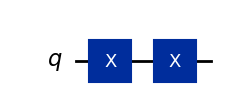

In [9]:
### (1) XX|0> ###

# Create the single-qubit quantum circuit
qc = QuantumCircuit(1)  ##your code goes here##

# Add a X gate to qubit 0
qc.x(0)  ##your code goes here##

# Add a X gate to qubit 0
qc.x(0)  ##your code goes here##

# Draw a circuit
qc.draw(output="mpl")

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


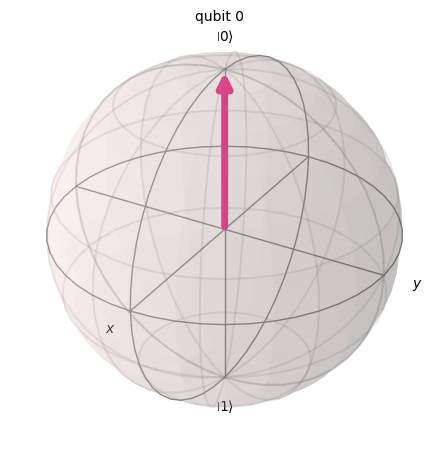

In [10]:
# See the statevector
out_vector = Statevector(qc)
print(out_vector)

# Draw a Bloch sphere
plot_bloch_multivector(out_vector)

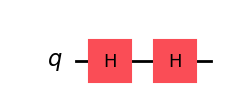

In [11]:
### (2) HH|0> ###
##your code goes here##
qc = QuantumCircuit(1)
qc.h(0)
qc.h(0)
qc.draw("mpl")

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


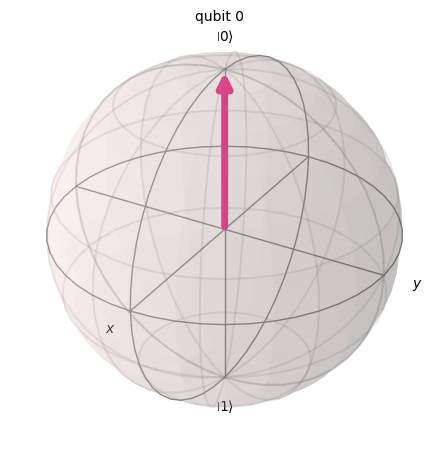

In [12]:
# See the statevector
out_vector = Statevector(qc)
print(out_vector)

# Draw a Bloch sphere
plot_bloch_multivector(out_vector)

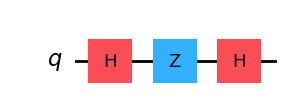

In [13]:
### (3) HZH|0> ###
##your code goes here##
qc = QuantumCircuit(1)
qc.h(0)
qc.z(0)
qc.h(0)
qc.draw("mpl")

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


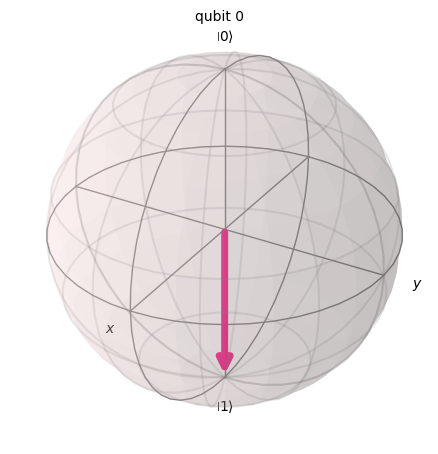

In [14]:
# See the statevector
out_vector = Statevector(qc)
print(out_vector)

# Draw a Bloch sphere
plot_bloch_multivector(out_vector)

### 3.3 測定

量子ビット $|\psi\rangle=\alpha|0\rangle+\beta|1\rangle$ は観測することによって、 $|0\rangle$または$|1\rangle$へ状態が変わります。そのとき、 $|0\rangle$を得る確率は、$|\alpha|^2$ であり、$|1\rangle$を得る確率は、$|\beta|^2$ です（ボルンの法則）。

$$p(|0\rangle) = |\langle 0|\psi\rangle|^2 = |\alpha|^2$$
$$p(|1\rangle) = |\langle 1|\psi\rangle|^2 = |\beta|^2$$

例えば、$|\psi\rangle=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$ を測定すると

$$\langle 0|\psi\rangle =\frac{1}{\sqrt{2}}\langle 0|0\rangle + \frac{1}{\sqrt{2}}\langle 0|1\rangle = \frac{1}{\sqrt{2}}\cdot 1+\frac{1}{\sqrt{2}} \cdot 0=\frac{1}{\sqrt{2}} $$
$$|\langle 0|\psi\rangle|^2 =  \frac{1}{2} $$

となり、50%の確率で$|0\rangle$が測定（50%の確率で$|1\rangle$が測定）されます。



#### Qiskit Aer Simulator

Aerシミュレーター（量子計算シミュレーター）で計算させ、測定します。1024回実行した結果、それぞれの状態が測定された回数を表示し、その測定確率をヒストグラムで表示します。


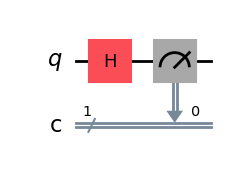

In [15]:
# Create a new circuit with one qubits (first argument) and one classical bits (second argument)
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure(0, 0)  # Add the measurement gate

qc.draw(output="mpl")

これで、Aerシミュレーターで回路を実行する準備が整いました。この例では、デフォルトのshots=1024を適用し、1024回測定することを意味します。次に、それらのカウントをヒストグラムにプロットします。

{'1': 501, '0': 523}


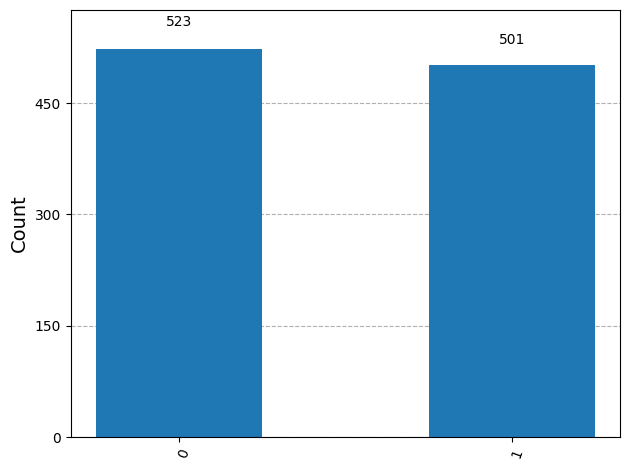

In [16]:
# Run the circuit on a simulator to get the results
# Define backend
backend = AerSimulator()

# Transpile to backend
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_qc = pm.run(qc)

# Run the job
sampler = Sampler(mode=backend)
job = sampler.run([isa_qc])
result = job.result()

# Print the results
counts = result[0].data.c.get_counts()
print(counts)

# Plot the counts in a histogram
plot_histogram(counts)

ほぼ50％ずつの確率で0と1が測定されることが確認できました。

## 4. 複数量子ビット回路ともつれ状態

### 4.1 複数量子ビット回路

コードで2量子ビットの量子回路を作成できます。各量子ビットにHゲートを適用します。

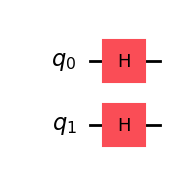

In [17]:
# Create the two qubits quantum circuit
qc = QuantumCircuit(2)

# Apply an H gate to qubit 0
qc.h(0)

# Apply an H gate to qubit 1
qc.h(1)

# Draw the circuit
qc.draw(output="mpl")

In [18]:
# See the statevector
out_vector = Statevector(qc)
print(out_vector)

Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],
            dims=(2, 2))


２量子ビットの状態は、１量子ビットの積（テンソル積）で表せます。

$|\psi\rangle=|q0\rangle \otimes|q1\rangle = (a|0\rangle+b|1\rangle) \otimes (c|0\rangle+d|1\rangle) $

$= ac|0\rangle|0\rangle+ad|0\rangle|1\rangle+bc|1\rangle|0\rangle+bd|1\rangle|1\rangle$

$= ac|00\rangle+ad|01\rangle+bc|10\rangle+bd|11\rangle$

(ただし、$|ac|^2+ |ad|^2+ |bc|^2+ |bd|^2=1$ )


Qiskitの初期値は、$|0\rangle|0\rangle=|00\rangle$なので、$H$をそれぞれの量子ビットに操作させることで均等な重ね合わせの状態になります。

$H|0\rangle \otimes H|0\rangle=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) \otimes \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) = \frac{1}{2}(|00\rangle+|01\rangle+|10\rangle+|11\rangle)$

$$ 
=\frac{1}{2}\left( \begin{bmatrix} 1 \\ 1 \end{bmatrix} \otimes \begin{bmatrix} 1 \\ 1 \end{bmatrix}\right) = \frac{1}{2}\begin{bmatrix} 1 \\ 1 \\ 1 \\ 1 \end{bmatrix}=\frac{1}{2}\left(\begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}+\begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix}+\begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \end{bmatrix}+\begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \end{bmatrix}\right)
$$

測定のルールも同じで、 $|00\rangle$ を測定する確率は、以下のように計算されます。
$$p(|00\rangle) = |\langle 00|\psi\rangle|^2 = |ac|^2$$



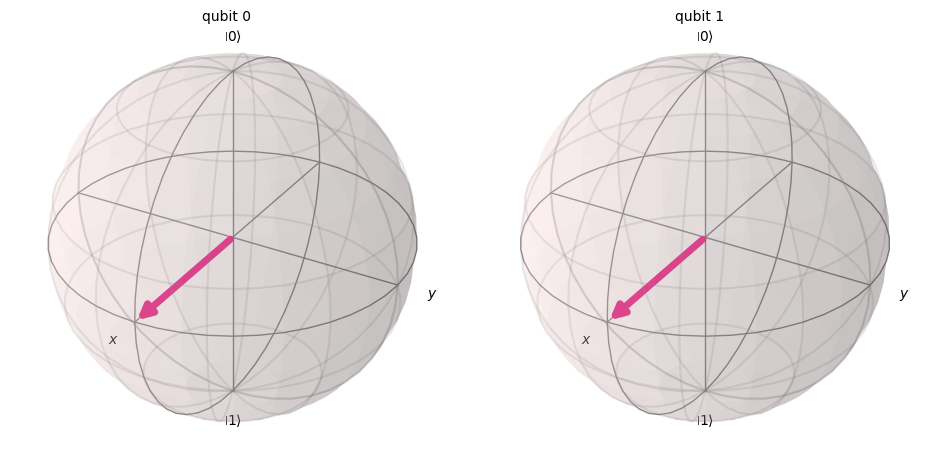

In [19]:
# Draw a Bloch sphere
plot_bloch_multivector(out_vector)

次に、この状態を測定してみましょう。

まず、測定回路を追加します。

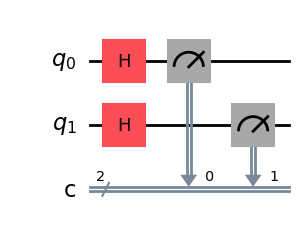

In [20]:
# Create a new circuit with two qubits (first argument) and two classical bits (second argument)
qc = QuantumCircuit(2, 2)

# Apply the gates
qc.h(0)
qc.h(1)

# Add the measurement gates
qc.measure(0, 0)  # Measure qubit 0 and save the result in bit 0
qc.measure(1, 1)  # Measure qubit 1 and save the result in bit 1

# Draw the circuit
qc.draw(output="mpl")

次にAerシミュレーター（量子計算シミュレーター）で計算させ、測定します。1024回実行した結果、それぞれの状態が測定された回数を表示し、その測定確率をヒストグラムで表示します。

{'10': 254, '01': 256, '00': 241, '11': 273}


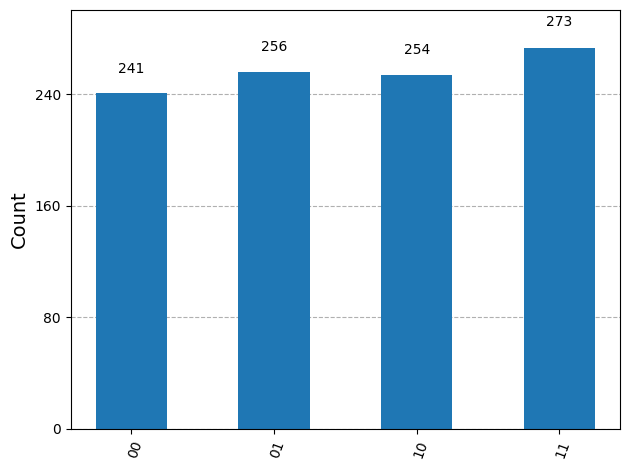

In [21]:
# Run the circuit on a simulator to get the results
# Define backend
backend = AerSimulator()

# Transpile to backend
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_qc = pm.run(qc)

# Run the job
sampler = Sampler(mode=backend)
job = sampler.run([isa_qc])
result = job.result()

# Print the results
counts = result[0].data.c.get_counts()
print(counts)

# Plot the counts in a histogram
plot_histogram(counts)

$|00\rangle$、$|01\rangle$、$|10\rangle$、$|11\rangle$の状態がほぼ25%ずつ均等に測定されました。

### 4.2 複数量子ゲート



#### CNOT ゲート
代表的な複数量子ゲートである $CNOT$ゲート（$CX$ゲート）は、２量子ビットにかかる量子ゲートで、制御ビットが1のときのみ、目標ビットの値を反転します。　

| Input (target,control) | Output (target,control) |
| :--------------------: | :---------------------: |
|           00           |            00           |
|           01           |            11           |
|           10           |            10           |
|           11           |            01           |


まず、q0とq1が両方とも0の場合を計算してみましょう。



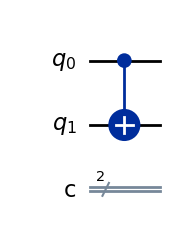

In [22]:
# Create a circuit with two quantum registers and two classical registers
qc = QuantumCircuit(2, 2)

# Apply the CNOT (cx) gate to a |00> state.
qc.cx(0, 1)  # Here the control is set to q0 and the target is set to q1.

# Draw the circuit
qc.draw(output="mpl")

In [23]:
# See the statevector
out_vector = Statevector(qc)
print(out_vector)

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


$|00\rangle$ に$CX$ゲートを操作しても$|00\rangle$ のままです。


#### 注: Qiskit のビット順について

ここで、Qiskitでは、最下位ビット(LSB)が右端で、多くの量子情報の教科書とは逆であることに注意してください。つまり、1量子ビット目が一番右のビットで、2量子ビット目が右から２番目のビットです。$|01\rangle$ とは、q0が1で、q1が0を表しています。



次に、$|01\rangle$ に$CX$ゲートを操作します。

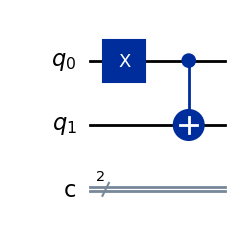

In [24]:
qc = QuantumCircuit(2, 2)

# q0=1, q1=0
qc.x(0)  # Apply a X gate to initialize q0 to 1
qc.cx(0, 1)  # Set the control bit to q0 and the target bit to q1.

# Draw the circuit
qc.draw(output="mpl")

In [25]:
# See the statevector
out_vector = Statevector(qc)
print(out_vector)

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
            dims=(2, 2))


$|01\rangle$ に$CX$ゲートを操作すると$|11\rangle$ になりました。

シミュレーターで計算してみましょう。

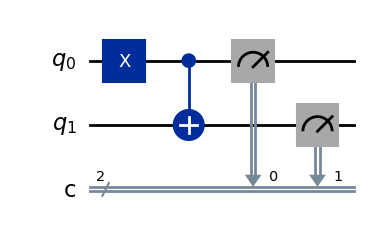

In [26]:
# Add measurements
qc.measure(0, 0)
qc.measure(1, 1)

# Draw the circuit
qc.draw(output="mpl")

{'11': 1024}


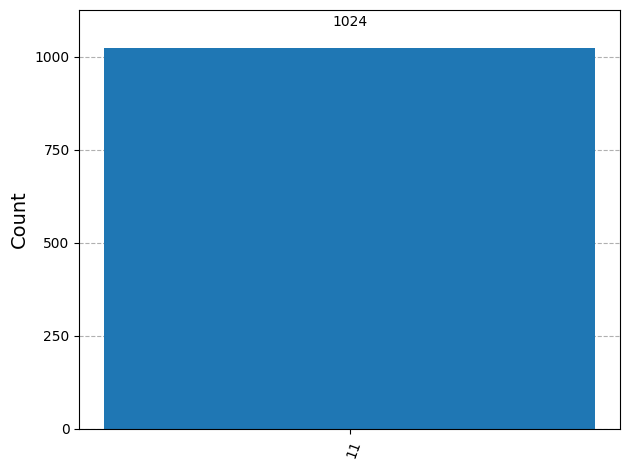

In [27]:
# Run the circuit on a simulator to get the results
# Define backend
backend = AerSimulator()

# Transpile to backend
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_qc = pm.run(qc)

# Run the job
sampler = Sampler(backend)
job = sampler.run([isa_qc])
result = job.result()

# Print the results
counts = result[0].data.c.get_counts()
print(counts)

# Plot the counts in a histogram
plot_histogram(counts)

$|11\rangle$の状態が100%測定されます。

### 4.3 量子もつれと実デバイス上での実行　

量子計算上でも重要な状態となる、量子もつれ状態（エンタングルメント状態）を生成してみましょう。

2量子ビットの量子もつれ状態の1つの例が次のような形になります。
$$\frac{1}{\sqrt{2}}|00\rangle + \frac{1}{\sqrt{2}}|11\rangle$$




2つの量子状態がエンタングルした状態とは、量子状態$|\psi\rangle _A$と$|\psi\rangle _B$からなる状態$|\psi\rangle _{AB}$が、個別の量子状態のテンソル積では表せない状態です。

$$|\psi\rangle _{AB}= \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle) = \frac{1}{\sqrt{2}}(|0\rangle_A|0\rangle_B +|1\rangle_A|1\rangle_B)$$

の個別の状態を以下とすると、

$$|\psi\rangle _A= a_0|0\rangle+a_1|1\rangle$$
$$|\psi\rangle _B= b_0|0\rangle+b_1|1\rangle$$

この2つの状態のテンソル積は
$$|\psi\rangle _A\otimes |\psi\rangle _B = a_0 b_0|00\rangle+a_0 b_1|01\rangle+a_1 b_0|10\rangle+a_1 b_1|11\rangle$$
となりますが、これを満たす $a_0, a_1, b_0, b_1$ はありません。


ベル状態を作成し、実際の量子コンピューターで実行してみましょう。次に、**Qiskit patterns** と呼ばれる量子プログラムを作成するための 4 つの手順に従います。

1. 問題を量子回路と演算子にマッピングする
2. ターゲットハードウェアに最適化する
3. ターゲットハードウェアでの実行
4. 結果を後処理する


#### Step 1. 問題を量子回路と演算子にマッピングする

量子プログラムでは、量子回路は量子命令を表すネイティブ形式です。回路を作成するときは、通常、新しい QuantumCircuit オブジェクトを作成し、それに命令を順番に追加します。

次のコードセルは、2 量子ビットのもつれ状態であるベル状態を生成する回路を作成します。

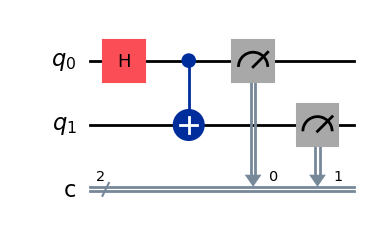

In [28]:
qc = QuantumCircuit(2, 2)

qc.h(0)
qc.cx(0, 1)

qc.measure(0, 0)
qc.measure(1, 1)

qc.draw("mpl")

#### Step 2. ターゲットハードウェアでの最適化

Qiskitは、抽象的な回路をQISA(Quantum Instruction Set Architecture)回路に変換し、ターゲットとするハードウェアの制約を考慮して、回路のパフォーマンスを最適化します。まず、最適化の前に、ターゲットとするハードウェアを指定します。

`qiskit-ibm-runtime` をインストールしていない場合は、インストールしてください。Qiskit Runtimeの詳細については、[APIリファレンス](https://quantum.cloud.ibm.com/docs/en/api/qiskit-ibm-runtime/runtime-service)をご覧ください。

In [31]:
# Install
# !pip install qiskit-ibm-runtime

We will specify the target hardware.



In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService()
service.backends()

In [ ]:
# You can specify the device
# backend = service.backend('ibm_kingston')

In [ ]:
# You can also identify the least busy device
backend = service.least_busy(operational=True)
print("The least busy device is ", backend)

回路のトランスパイルは、別の複雑なプロセスです。非常に簡単に言うと、これにより、"ネイティブ ゲート" (特定の量子コンピューターが実装できるゲート) を使用して回路が論理的に同等のものに書き換えられ、回路内の量子ビットがターゲットの量子コンピューター上の最適な実際の量子ビットにマップされます。トランスパイルの詳細については、この[ドキュメント](https://quantum.cloud.ibm.com/docs/en/api/qiskit/transpiler#overview)を参照してください。

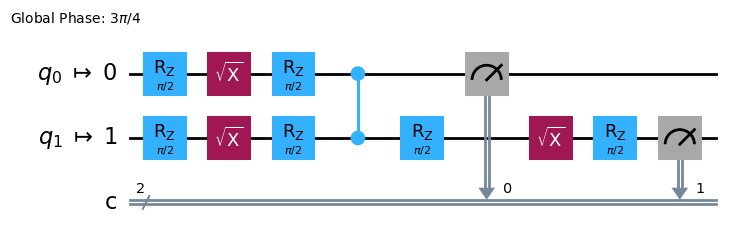

In [30]:
# Transpile the circuit into basis gates executable on the hardware
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
target_circuit = pm.run(qc)

target_circuit.draw("mpl", idle_wires=False)

トランスパイルで、新しいゲートを使用して回路が書き換えられたことがわかります。ECRゲートの詳細については、こちらの[ドキュメンテーション](https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.circuit.library.ECRGate#ecrgate)を参照してください。

#### Step 3. Eターゲット回路を実行する

次に、実際のデバイス上でターゲット回路を実行します。

In [31]:
sampler = Sampler(backend)
job_real = sampler.run([target_circuit])

job_id = job_real.job_id()
print("job id:", job_id)

job id: d1icj8kuvp6s73c6bd40


量子コンピューターは貴重なリソースであり、非常に需要が高いため、実際に実デバイスで実行するとキューで待機しなければならない場合があります。job_idをつかって、ジョブの実行状況と結果を後で確認できます。

In [34]:
# Check the job status (replace the job id below with your own)
job_real = service.job(job_id) 
job_real.status()

'DONE'

IBM Quantumダッシュボードからジョブのステータスを確認することもできます：[https://quantum.cloud.ibm.com/workloads](https://quantum.cloud.ibm.com/workloads)



In [36]:
# If the Notebook session got disconnected you can also check your job status by running the following code
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService()
job_real = service.job('d1icj8kuvp6s73c6bd40')  # Input your job-id between the quotations
job_real.status()

'DONE'

In [37]:
# Execute after job has successfully run
result_real = job_real.result()
print(result_real[0].data.c.get_counts())

{'11': 1994, '00': 1987, '01': 52, '10': 63}


#### Step 4. 結果を後処理する
最後に、結果を後処理して、値やグラフなどの期待される形式で出力を作成する必要があります。



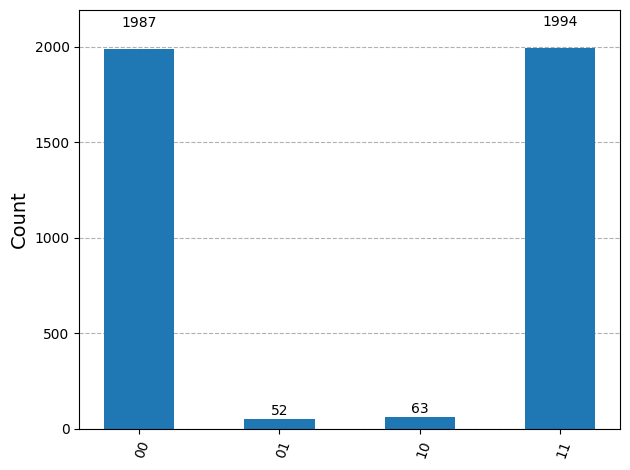

In [38]:
plot_histogram(result_real[0].data.c.get_counts())

ご覧の通り、$|00\rangle$と$|11\rangle$が最も頻繁に観測されています。予想されたデータ以外にも結果が少し観測されますが、これはノイズと量子ビットのデコヒーレンスによるものです。量子コンピューターのエラーとノイズについては、このコースの後半のレッスンで詳しく説明します。

### 4.4 GHZ 状態

3量子ビット以上が完全にエンタングルした状態をGHZ状態 (Greenberger–Horne–Zeilinger state) と呼びます。

$$\frac{1}{\sqrt 2}(|000\rangle + |111\rangle)$$

３量子ビットのGHZ状態は、次のような量子回路で作成することができます。

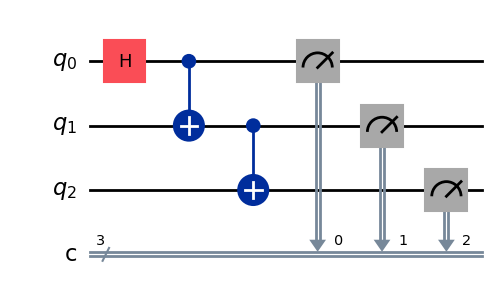

In [39]:
qc = QuantumCircuit(3, 3)

qc.h(0)
qc.cx(0, 1)
qc.cx(1, 2)

qc.measure(0, 0)
qc.measure(1, 1)
qc.measure(2, 2)

qc.draw("mpl")



量子回路の「深さ」は、量子回路を説明するための便利で一般的な指標です。量子回路内のパスをトレースし、左から右に移動し、複数量子ビットゲートによって接続されている場合にのみ量子ビットを変更します。そのパスに沿ったゲートの数を数えます。回路を通るこのようなパスの最大ゲート数は深さです。現代のノイズの多い量子コンピューターでは、奥行きの浅い回路はエラーが少なく、良好な結果を返す可能性があります。非常に深い回路はそうではありません。

 `QuantumCircuit.depth()`を使用して、量子回路の深さを確認できます。上記の回路の深さは4です。一番上の量子ビットには、測定値を含めて 3 つのゲートしかありません。ただし、最上位の量子ビットから量子ビット 1 または量子ビット 2 までのパスがあり、これには別の CNOT ゲートが含まれます。




In [40]:
qc.depth()

4

### Exercise 2

$8$ 量子ビットのGHZ状態は、以下のようになります。

$$\frac{1}{\sqrt 2}(|00000000\rangle + |11111111\rangle)$$

この状態を最も浅い回路で作ってみましょう。最も浅い量子回路の depth は、測定ゲートを合わせて 5 です！

**Solution**:



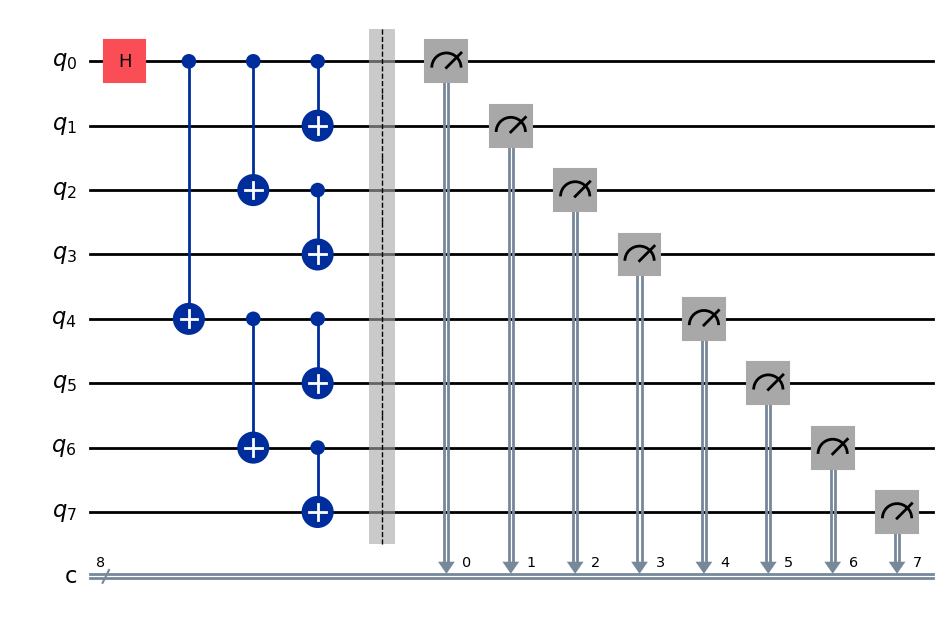

In [41]:
# Step 1
qc = QuantumCircuit(8, 8)

##your code goes here##
qc.h(0)
qc.cx(0, 4)
qc.cx(4, 6)
qc.cx(6, 7)

qc.cx(4, 5)

qc.cx(0, 2)
qc.cx(2, 3)

qc.cx(0, 1)
qc.barrier()  # for visual separation

# measure
for i in range(8):
    qc.measure(i, i)

qc.draw("mpl")
# print(qc.depth())

In [42]:
print(qc.depth())

5


{'00000000': 511, '11111111': 513}


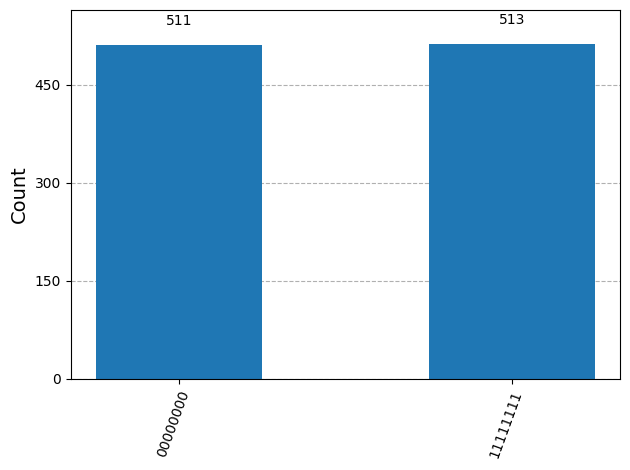

In [43]:
from qiskit.visualization import plot_histogram
# Step 2
# For this exercise, the circuit and operators are simple, so no optimizations are needed.

# Step 3
# Run the circuit on a simulator to get the results
backend = AerSimulator()

pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_qc = pm.run(qc)

sampler = Sampler(mode=backend)
job = sampler.run([isa_qc], shots=1024)
result = job.result()

counts = result[0].data.c.get_counts()
print(counts)

# Step 4
# Plot the counts in a histogram

plot_histogram(counts)

## 5. まとめ

量子ビットと量子ゲートを用いた回路モデルによる量子計算を学習し、重ね合わせ、測定、エンタングルメントについて復習しました。また、実際の量子デバイス上で量子回路を実行する方法も学習しました。

GHZ回路を作成する最後の演習では、ノイズの多い量子コンピューターでユーティリティスケールのソリューションを得るための重要な要素である回路の深さを減らすことを試みました。 このコースの後のレッスンでは、ノイズとエラー軽減方法について詳細に学習します。このレッスンでは、導入として理想的なデバイスの回路深度を小さくすることを検討しましたが、実際には、量子ビット接続などの実際のデバイスの制約を考慮する必要があります。 これについては、このコースの後続のレッスンで詳しく説明します。


In [44]:
# See the version of Qiskit
import qiskit

qiskit.__version__

'2.0.2'

© IBM Corp., 2017-2025